## House Price Prediction using Regularization (Ridge and Lasso) Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1015]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1016]:
# reading the dataset
house = pd.read_csv("train.csv")

In [1017]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1018]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [1019]:
# Checking the percentage of null values in each column
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [1020]:
#cleaning

#Columns with more than 30% null entries

morethan30=house.isnull().sum()
morethan30=morethan30[morethan30.values>(0.3*len(morethan30))]
len(morethan30)

16

In [1021]:
#Total 16 cols found with more than 30% null entries
#removing thease cols

morethan30 = list(morethan30[morethan30.values>=0.3].index)
house.drop(labels=morethan30,axis=1,inplace=True)
len(morethan30)

16

In [1022]:
# Checking the percentage of null values in each column
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
SalePrice        0.00
OverallCond      0.00
BsmtFinSF2       0.00
BsmtFinSF1       0.00
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallQual      0.00
TotalBsmtSF      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtUnfSF        0.00
Heating          0.00
SaleCondition    0.00
Fireplaces       0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF

In [1023]:
house.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [1024]:
# Replace / Imputing Null Values
house.loc[house['MasVnrArea'].isnull(),'MasVnrArea']=0.0

In [1025]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1026]:
# Replace / Imputing Null Values
house.loc[house['MasVnrType'].isnull(),'MasVnrType']='None'

In [1027]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1028]:
# Replace / Imputing Null Values
house.loc[house['Electrical'].isnull(),'Electrical']='SBrkr'

In [1029]:
# Checking for duplicate rows in the dataset

house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [1030]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 2. Normalizing Data
1. In the categorical Variables some of the values in that column occur less than 1% . Those values can be grouped together thereby reducing the number of columns during dummy variables creation
2. In some of the categorical Variables where one values occur more than 99%. There column can be removed.

In [1031]:
# Checking the percentage of values in the categorical column
print('\n Column Name : MSSubClass \n')
print('***************************Before Normalising****************************')
print(house['MSSubClass'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['MSSubClass'] = house['MSSubClass'].replace([190,85,75,45,180,40
                                                          ], 0)
print('\n\n***************************After Normalising****************************')
house['MSSubClass'].value_counts(normalize=True)*100


 Column Name : MSSubClass 

***************************Before Normalising****************************
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64


***************************After Normalising****************************


20     36.712329
60     20.479452
50      9.863014
0       6.301370
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
Name: MSSubClass, dtype: float64

In [1032]:
round((house.groupby('Neighborhood').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

Neighborhood
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
SWISU       1.71
StoneBr     1.71
Blmngtn     1.16
MeadowV     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Id, dtype: float64

In [1033]:
# Checking the percentage of values in the categorical column
print('\n Column Name : LandContour \n')
print('***************************Before Normalising****************************')
print(house['LandContour'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['LandContour'] = house['LandContour'].replace(['Bnk','HLS','Low'
                                                          ], 'Non-Lvl')
print('\n\n***************************After Normalising****************************')
house['LandContour'].value_counts(normalize=True)*100


 Column Name : LandContour 

***************************Before Normalising****************************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


***************************After Normalising****************************


Lvl        89.794521
Non-Lvl    10.205479
Name: LandContour, dtype: float64

In [1034]:
# Checking the percentage of values in the categorical column
print(house['Utilities'].value_counts(normalize=True)*100)

#this column can be removed as about 99% of values are "AllPub"
house = house.drop(['Utilities'], axis=1)

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


In [1035]:
# Checking the percentage of values in the categorical column
print('\n Column Name : LotConfig \n')
print('***************************Before Normalising****************************')
print(house['LotConfig'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['LotConfig'] = house['LotConfig'].replace(['FR2','FR3'
                                                          ], 'FR')
print('\n\n***************************After Normalising****************************')
house['LotConfig'].value_counts(normalize=True)*100


 Column Name : LotConfig 

***************************Before Normalising****************************
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64


***************************After Normalising****************************


Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR          3.493151
Name: LotConfig, dtype: float64

In [1036]:
# Checking the percentage of values in the categorical column
print('\n Column Name : LandSlope \n')
print('***************************Before Normalising****************************')
print(house['LandSlope'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['LandSlope'] = house['LandSlope'].replace(['Mod','Sev'
                                                          ], 'Slopy')
print('\n\n***************************After Normalising****************************')
house['LandSlope'].value_counts(normalize=True)*100


 Column Name : LandSlope 

***************************Before Normalising****************************
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


***************************After Normalising****************************


Gtl      94.657534
Slopy     5.342466
Name: LandSlope, dtype: float64

In [1037]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Condition1 \n')
print('***************************Before Normalising****************************')
print(house['Condition1'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Condition1'] = house['Condition1'].replace(['RRAe','PosA','RRNn','RRNe'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Condition1'].value_counts(normalize=True)*100


 Column Name : Condition1 

***************************Before Normalising****************************
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64


***************************After Normalising****************************


Norm      86.301370
Feedr      5.547945
Artery     3.287671
Others     1.780822
RRAn       1.780822
PosN       1.301370
Name: Condition1, dtype: float64

In [1038]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Condition2 \n')
print('***************************Before Normalising****************************')
print(house['Condition2'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Condition2'] = house['Condition2'].replace(['RRAe','PosA','RRNn','RRNe','Feedr','PosN','Artery','RRAn'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Condition2'].value_counts(normalize=True)*100


 Column Name : Condition2 

***************************Before Normalising****************************
Norm      98.972603
Feedr      0.410959
PosN       0.136986
RRNn       0.136986
Artery     0.136986
RRAe       0.068493
PosA       0.068493
RRAn       0.068493
Name: Condition2, dtype: float64


***************************After Normalising****************************


Norm      98.972603
Others     1.027397
Name: Condition2, dtype: float64

In [1039]:
round((house.groupby('BldgType').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

BldgType
1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: Id, dtype: float64

In [1040]:
# Checking the percentage of values in the categorical column
print('\n Column Name : HouseStyle \n')
print('***************************Before Normalising****************************')
print(house['HouseStyle'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['HouseStyle'] = house['HouseStyle'].replace(['1.5Unf','2.5Unf','2.5Fin'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['HouseStyle'].value_counts(normalize=True)*100


 Column Name : HouseStyle 

***************************Before Normalising****************************
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64


***************************After Normalising****************************


1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
Others     2.260274
Name: HouseStyle, dtype: float64

In [1041]:
round((house.groupby('OverallQual').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

OverallQual
5     27.19
6     25.62
7     21.85
8     11.51
4      7.95
9      2.95
3      1.37
10     1.23
2      0.21
1      0.14
Name: Id, dtype: float64

In [1042]:
round((house.groupby('OverallCond').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

OverallCond
5    56.23
6    17.26
7    14.04
8     4.93
4     3.90
3     1.71
9     1.51
2     0.34
1     0.07
Name: Id, dtype: float64

In [1043]:
# Checking the percentage of values in the categorical column
print('\n Column Name : RoofStyle \n')
print('***************************Before Normalising****************************')
print(house['RoofStyle'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['RoofStyle'] = house['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['RoofStyle'].value_counts(normalize=True)*100


 Column Name : RoofStyle 

***************************Before Normalising****************************
Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64


***************************After Normalising****************************


Gable     78.150685
Hip       19.589041
Others     2.260274
Name: RoofStyle, dtype: float64

In [1044]:
# Checking the percentage of values in the categorical column
print('\n Column Name : RoofMatl \n')
print('***************************Before Normalising****************************')
print(house['RoofMatl'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['RoofMatl'] = house['RoofMatl'].replace(['Tar&Grv','WdShngl','WdShake','Roll','Metal','Membran','ClyTile'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['RoofMatl'].value_counts(normalize=True)*100


 Column Name : RoofMatl 

***************************Before Normalising****************************
CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
ClyTile     0.068493
Membran     0.068493
Roll        0.068493
Name: RoofMatl, dtype: float64


***************************After Normalising****************************


CompShg    98.219178
Others      1.780822
Name: RoofMatl, dtype: float64

In [1045]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Exterior1st \n')
print('***************************Before Normalising****************************')
print(house['Exterior1st'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Exterior1st'] = house['Exterior1st'].replace(['Stone','BrkComm','ImStucc','CBlock','AsphShn'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Exterior1st'].value_counts(normalize=True)*100


 Column Name : Exterior1st 

***************************Before Normalising****************************
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
CBlock      0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64


***************************After Normalising****************************


VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Others      0.479452
Name: Exterior1st, dtype: float64

In [1046]:
round((house.groupby('Exterior2nd').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)
# Checking the percentage of values in the categorical column
print('\n Column Name : Exterior2nd \n')
print('***************************Before Normalising****************************')
print(house['Exterior2nd'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Exterior2nd'] = house['Exterior2nd'].replace(['ImStucc','Brk Cmn','Stone','AsphShn','Other','CBlock'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Exterior2nd'].value_counts(normalize=True)*100


 Column Name : Exterior2nd 

***************************Before Normalising****************************
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
CBlock      0.068493
Other       0.068493
Name: Exterior2nd, dtype: float64


***************************After Normalising****************************


VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Others      1.849315
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
Name: Exterior2nd, dtype: float64

In [1047]:
round((house.groupby('ExterQual').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

ExterQual
TA    62.05
Gd    33.42
Ex     3.56
Fa     0.96
Name: Id, dtype: float64

In [1048]:
round((house.groupby('ExterCond').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

ExterCond
TA    87.81
Gd    10.00
Fa     1.92
Ex     0.21
Po     0.07
Name: Id, dtype: float64

In [1049]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Foundation \n')
print('***************************Before Normalising****************************')
print(house['Foundation'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Foundation'] = house['Foundation'].replace(['Stone','Wood'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Foundation'].value_counts(normalize=True)*100


 Column Name : Foundation 

***************************Before Normalising****************************
PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64


***************************After Normalising****************************


PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Others     0.616438
Name: Foundation, dtype: float64

In [1050]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Heating \n')
print('***************************Before Normalising****************************')
print(house['Heating'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Heating'] = house['Heating'].replace(['Grav','Wall','OthW','Floor'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Heating'].value_counts(normalize=True)*100


 Column Name : Heating 

***************************Before Normalising****************************
GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64


***************************After Normalising****************************


GasA      97.808219
GasW       1.232877
Others     0.958904
Name: Heating, dtype: float64

In [1051]:
round((house.groupby('HeatingQC').agg('count')/len(house))*100,2)['Id'].sort_values(ascending=False)

HeatingQC
Ex    50.75
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07
Name: Id, dtype: float64

In [1052]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Electrical \n')
print('***************************Before Normalising****************************')
print(house['Electrical'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Electrical'] = house['Electrical'].replace(['FuseP','Mix'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Electrical'].value_counts(normalize=True)*100


 Column Name : Electrical 

***************************Before Normalising****************************
SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64


***************************After Normalising****************************


SBrkr     91.438356
FuseA      6.438356
FuseF      1.849315
Others     0.273973
Name: Electrical, dtype: float64

In [1053]:
# Checking the percentage of values in the categorical column
print('\n Column Name : Functional \n')
print('***************************Before Normalising****************************')
print(house['Functional'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['Functional'] = house['Functional'].replace(['Maj1','Maj2','Sev'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['Functional'].value_counts(normalize=True)*100


 Column Name : Functional 

***************************Before Normalising****************************
Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64


***************************After Normalising****************************


Typ       93.150685
Min2       2.328767
Min1       2.123288
Others     1.369863
Mod        1.027397
Name: Functional, dtype: float64

In [1054]:
# Checking the percentage of values in the categorical column
print('\n Column Name : SaleType \n')
print('***************************Before Normalising****************************')
print(house['SaleType'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['SaleType'] = house['SaleType'].replace(['ConLD','ConLw','ConLI','CWD','Oth','Con'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['SaleType'].value_counts(normalize=True)*100


 Column Name : SaleType 

***************************Before Normalising****************************
WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64


***************************After Normalising****************************


WD        86.780822
New        8.356164
COD        2.945205
Others     1.917808
Name: SaleType, dtype: float64

In [1055]:
# Checking the percentage of values in the categorical column
print('\n Column Name : SaleCondition \n')
print('***************************Before Normalising****************************')
print(house['SaleCondition'].value_counts(normalize=True)*100)

# Group togother values of this categorical column into one ("Others"), whose occurence are less than 1%
house['SaleCondition'] = house['SaleCondition'].replace(['Alloca','AdjLand'
                                                          ], 'Others')
print('\n\n***************************After Normalising****************************')
house['SaleCondition'].value_counts(normalize=True)*100


 Column Name : SaleCondition 

***************************Before Normalising****************************
Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64


***************************After Normalising****************************


Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Others      1.095890
Name: SaleCondition, dtype: float64

In [1056]:
#changing months to categorical
import calendar

house['MonthSold'] = house['MoSold'].apply(lambda x: calendar.month_name[x])
house=house.drop(['MoSold'], axis=1)

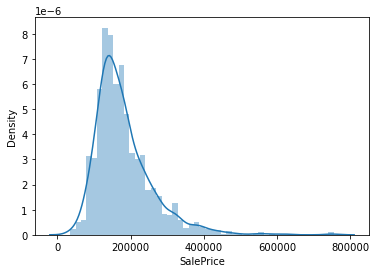

In [1057]:
# target variable: Saleprice of house
sns.distplot(house['SalePrice'])
plt.show()

In [1058]:
#DERIVED VARIABLES which might make more sense than year

house['Age'] = house['YrSold'] - house['YearBuilt']
house['Remod_Age'] = house['YrSold'] - house['YearRemodAdd']
house.drop(['YearBuilt','YearRemodAdd','YrSold'],1, inplace = True)

In [1059]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,MonthSold,Age,Remod_Age
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,WD,Normal,208500,February,5,5
1,2,20,RL,9600,Pave,Reg,Lvl,FR,Gtl,Veenker,...,0,0,0,0,WD,Normal,181500,May,31,31
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,WD,Normal,223500,September,7,6
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,WD,Abnorml,140000,February,91,36
4,5,60,RL,14260,Pave,IR1,Lvl,FR,Gtl,NoRidge,...,0,0,0,0,WD,Normal,250000,December,8,8


#### Data Exploration

To perform regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

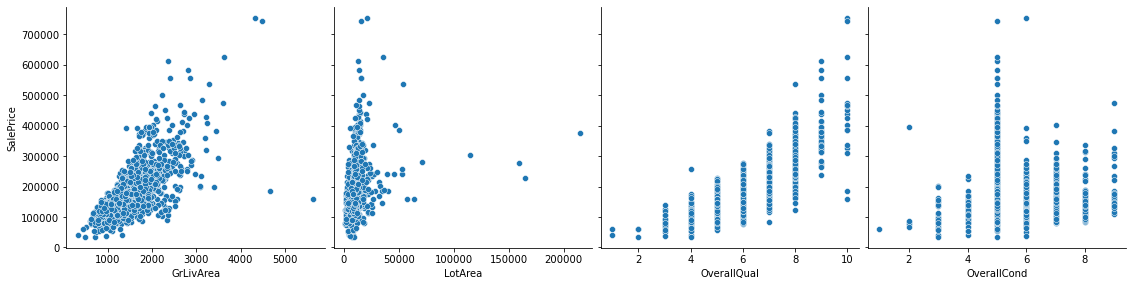

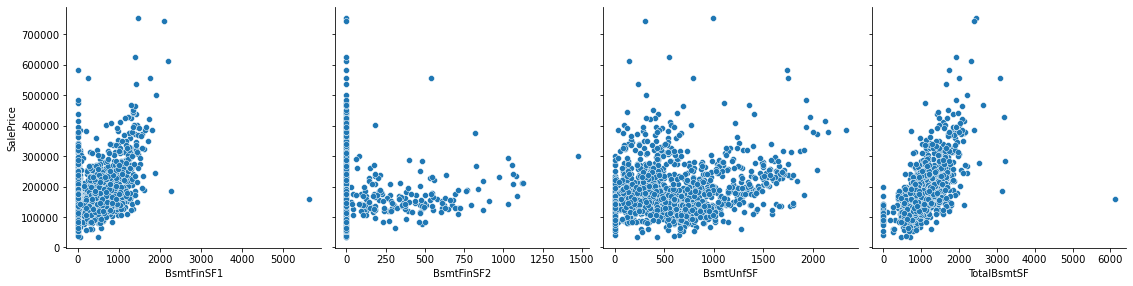

In [1060]:
#function to plot scatter plot numeric variables with price
def pp(w,x,y,z):
    sns.pairplot(diag_kind= None,data=house, x_vars=[w,x,y,z], y_vars=['SalePrice'],height=4, aspect=1, kind='scatter')
    plt.show()
pp('GrLivArea','LotArea','OverallQual','OverallCond')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

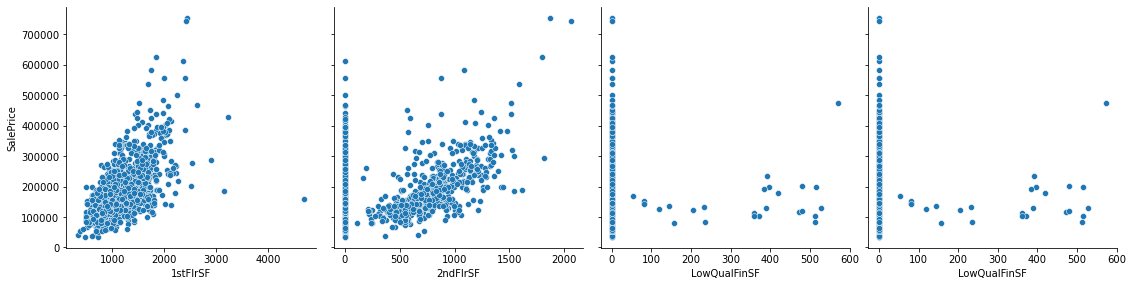

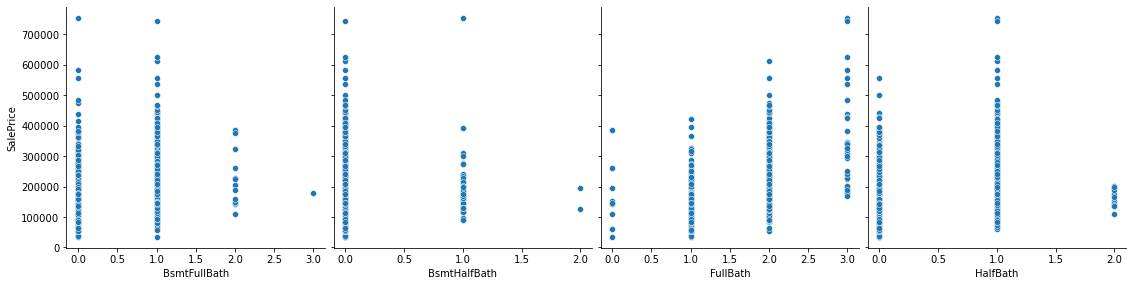

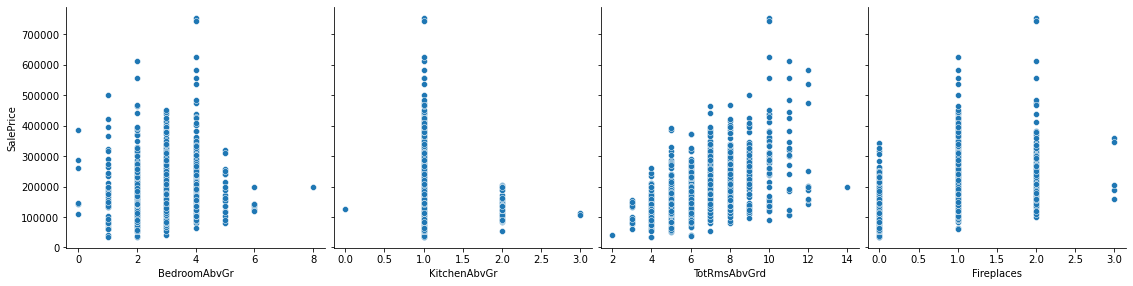

In [1061]:
#function to plot scatter plot numeric variables with price
def pp(w,x,y,z):
    sns.pairplot(diag_kind= None,data=house, x_vars=[w,x,y,z], y_vars=['SalePrice'],height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','LowQualFinSF')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

In [1062]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

We will drop Categorial numerical value and ID

In [1063]:
# dropping symboling and car_ID 
house_numeric = house_numeric.drop(['Id','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                   'Fireplaces','GarageCars'], axis=1)
house_numeric.head()

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Remod_Age
0,60,8450,196.0,706,0,150,856,856,854,0,...,0,61,0,0,0,0,0,208500,5,5
1,20,9600,0.0,978,0,284,1262,1262,0,0,...,298,0,0,0,0,0,0,181500,31,31
2,60,11250,162.0,486,0,434,920,920,866,0,...,0,42,0,0,0,0,0,223500,7,6
3,70,9550,0.0,216,0,540,756,961,756,0,...,0,35,272,0,0,0,0,140000,91,36
4,60,14260,350.0,655,0,490,1145,1145,1053,0,...,192,84,0,0,0,0,0,250000,8,8


### Outlier Treatment

In [1064]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Remod_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,49.294521,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,22.950000
std,38.093473,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,20.640653
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000
25%,20.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000
50%,50.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000
75%,60.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,41.000000
90%,120.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,84.000000,56.000000
95%,120.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,91.000000,58.000000
99%,160.000000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.410000,60.000000


(1436, 63)

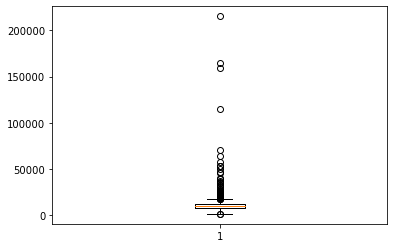

In [1065]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1423, 63)

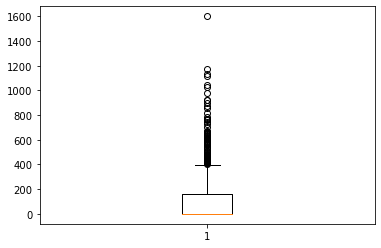

In [1066]:
# outlier treatment
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1417, 63)

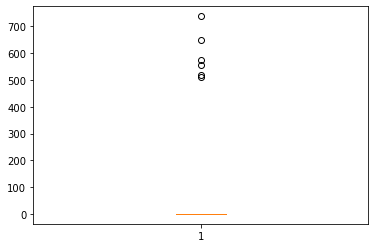

In [1067]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1368, 63)

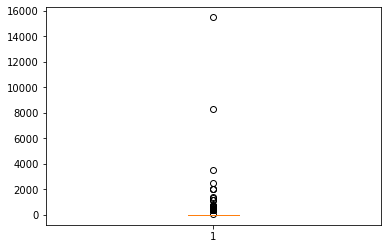

In [1068]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1364, 63)

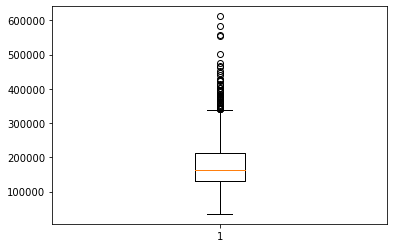

In [1069]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [1070]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Remod_Age
MSSubClass,1.000000,-0.181722,0.118006,-0.078995,-0.053539,-0.053071,-0.155267,-0.189825,0.321831,-0.055865,...,0.029711,0.018512,-0.090016,-0.025438,-0.015882,0.005715,-0.022069,0.024060,-0.218531,-0.134854
LotArea,-0.181722,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014832,-0.014709
MasVnrArea,0.118006,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.311479,-0.177105
BsmtFinSF1,-0.078995,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.248483,-0.127556
BsmtFinSF2,-0.053539,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.050422,0.069814
BsmtUnfSF,-0.053071,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.150619,-0.183830
TotalBsmtSF,-0.155267,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391498,-0.292096
1stFlrSF,-0.189825,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.282143,-0.241310
2ndFlrSF,0.321831,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,-0.011552,-0.141903
LowQualFinSF,-0.055865,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606,0.182228,0.060573


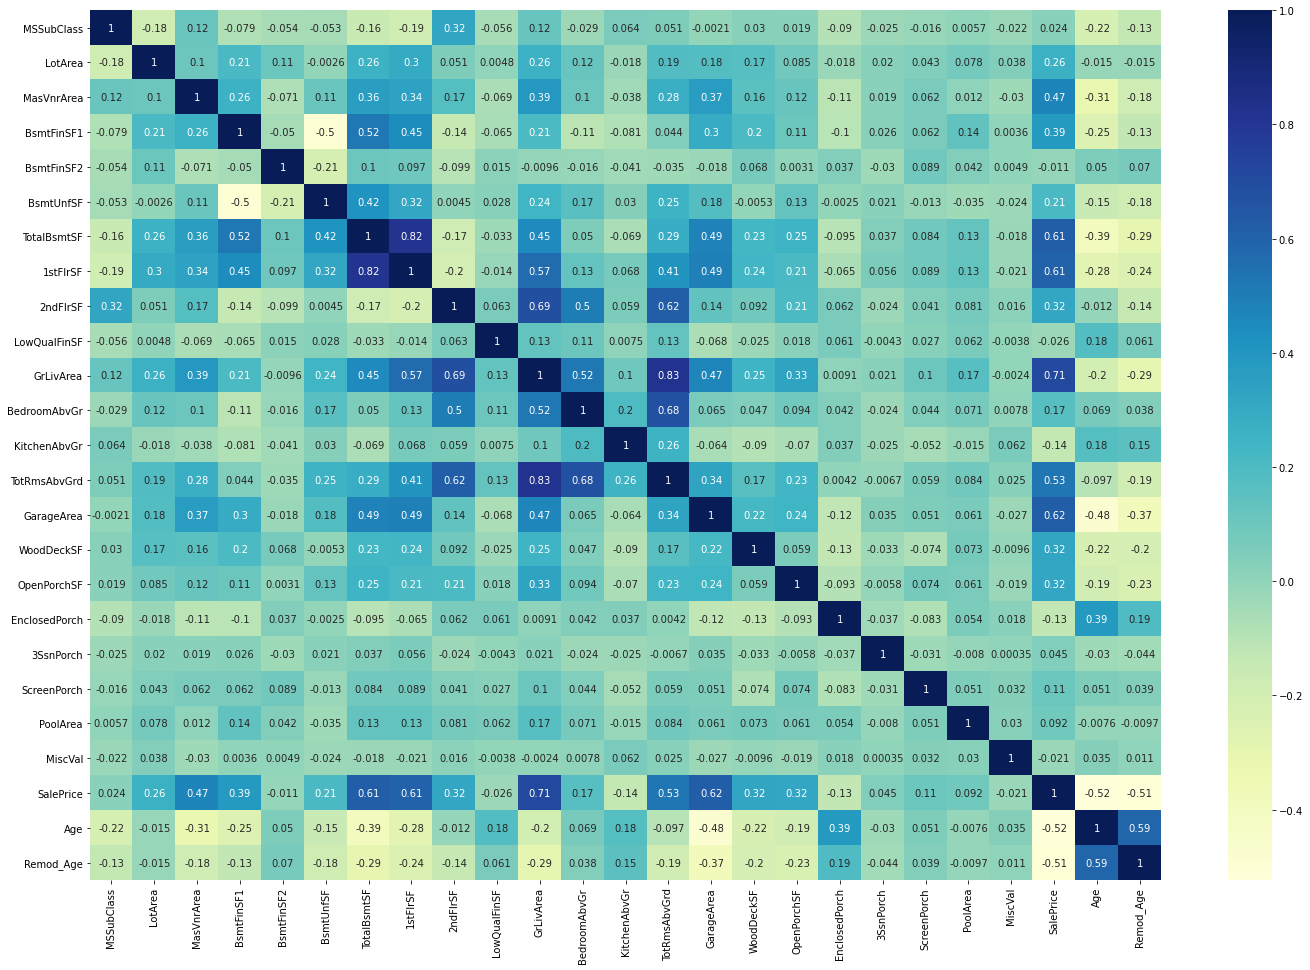

In [1071]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivAArea, FullBath, TotRmsAbvGrd, GargageCars, GargageArea
- Age is negatively correlated with Price.


Correlation among independent variables:
- Many independent variables are highly correlated we'll have to pay attention to multicollinearity

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [1072]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1364 non-null   int64  
 1   MSSubClass     1364 non-null   int64  
 2   MSZoning       1364 non-null   object 
 3   LotArea        1364 non-null   int64  
 4   Street         1364 non-null   object 
 5   LotShape       1364 non-null   object 
 6   LandContour    1364 non-null   object 
 7   LotConfig      1364 non-null   object 
 8   LandSlope      1364 non-null   object 
 9   Neighborhood   1364 non-null   object 
 10  Condition1     1364 non-null   object 
 11  Condition2     1364 non-null   object 
 12  BldgType       1364 non-null   object 
 13  HouseStyle     1364 non-null   object 
 14  OverallQual    1364 non-null   int64  
 15  OverallCond    1364 non-null   int64  
 16  RoofStyle      1364 non-null   object 
 17  RoofMatl       1364 non-null   object 
 18  Exterior

In [1073]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,MonthSold,Age,Remod_Age
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,WD,Normal,208500,February,5,5
1,2,20,RL,9600,Pave,Reg,Lvl,FR,Gtl,Veenker,...,0,0,0,0,WD,Normal,181500,May,31,31
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,WD,Normal,223500,September,7,6
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,WD,Abnorml,140000,February,91,36
4,5,60,RL,14260,Pave,IR1,Lvl,FR,Gtl,NoRidge,...,0,0,0,0,WD,Normal,250000,December,8,8


In [1074]:
# split into X and y
X = house.loc[:, ['MSSubClass',
'MSZoning',
'LotArea',
'Street',
'LotShape',
'LandContour',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'MasVnrArea',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'TotRmsAbvGrd',
'Functional',
'Fireplaces',
'GarageCars',
'GarageArea',
'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MonthSold',
'SaleType',
'SaleCondition',
'Age',
'Remod_Age']] # predictors in variable X

y =np.log(house['SalePrice']) # response variable in Y


In [1075]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,MonthSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,February,WD,Normal
1,RL,Pave,Reg,Lvl,FR,Gtl,Veenker,Feedr,Norm,1Fam,...,GasA,Ex,Y,SBrkr,TA,Typ,Y,May,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,September,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,GasA,Gd,Y,SBrkr,Gd,Typ,Y,February,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR,Gtl,NoRidge,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,December,WD,Normal


In [1076]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Non-Lvl,LotConfig_CulDSac,...,MonthSold_November,MonthSold_October,MonthSold_September,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [1077]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [1078]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [1079]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import StandardScaler

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
scaler = StandardScaler()
cols = X.columns
scaler.fit(X)
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September',
       'SaleType_New', 'SaleType_Others', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=157)

In [1080]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [1081]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1082]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.07770378415038273


In [1083]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.19108651e-04  5.77515338e-06  5.52814168e-02  4.15470762e-02
  4.41357448e-05  7.52786141e-05  2.26978419e-05 -1.28605062e-05
  8.51159480e-05  1.02042574e-04  5.67709938e-05  1.57797555e-05
  1.74593324e-04  1.41494719e-02 -1.56701289e-03  3.11599808e-02
  2.66036776e-02 -1.83074536e-04 -4.95654722e-02  1.68017611e-03
  1.66875468e-02  2.03390535e-02  9.09656868e-05  9.98243325e-05
  1.04508171e-04  1.31981985e-04  1.06586528e-04  2.70600206e-04
  0.00000000e+00  0.00000000e+00 -2.00624868e-03 -9.99675183e-04
  3.10363621e-02  2.45893973e-02  6.06245981e-02  1.21109252e-02
 -9.92766993e-03  2.67670884e-02  1.05527157e-03 -1.39311728e-04
  1.47525573e-02  1.58119445e-02 -1.75536446e-02 -7.60151967e-03
 -7.28755633e-04  5.08217300e-03 -2.61901286e-02  6.49432485e-02
  7.97585054e-03 -1.52072843e-02  9.51776149e-02 -5.13605807e-02
 -2.61748157e-02 -3.54374695e-02 -5.07764728e-02 -3.11426642e-02
 -1.02379541e-02  9.14983833e-03 -1.37307240e-02 -1.12740089e-03
  2.69101829e-02 -3.20328

In [1084]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': ridge.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(5)

,Attribute,Importance
50,Neighborhood_Crawfor,0.095178
47,Neighborhood_BrkSide,0.064943
136,Functional_Typ,0.060846
34,MSZoning_RL,0.060625
126,CentralAir_Y,0.056995


In [1085]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9350200523351093
0.9163039225441548
8.645908996795129
5.684647356448732
0.009062797690560932
0.01386499355231398


In [1086]:
y_pred_test

array([12.04248407, 12.01396418, 12.19894019, 11.95532327, 12.02867919,
       11.41264045, 12.33083819, 12.6388709 , 12.20268804, 12.16723689,
       11.97812231, 11.74214306, 11.50100708, 12.41399912, 11.5161307 ,
       11.79370884, 11.82585721, 12.23206675, 11.71930477, 12.1173545 ,
       12.57561534, 11.94624372, 12.56378894, 11.41524333, 12.3881592 ,
       11.35407386, 11.61213121, 12.51621134, 12.65503471, 11.83114206,
       12.48878409, 11.70151044, 12.46919149, 12.14145465, 11.43376349,
       11.34674997, 11.63153069, 11.93086247, 11.6037899 , 11.66694477,
       12.27478972, 12.24288785, 11.74297016, 12.0930908 , 11.73756644,
       12.70560859, 11.80621169, 12.02694585, 12.73320132, 11.90214077,
       12.53702202, 12.05637595, 12.99931361, 12.25095952, 11.81793762,
       11.41035357, 11.87048866, 12.35635235, 11.65816824, 12.82364151,
       11.61965179, 11.35468114, 12.11981946, 12.74669397, 11.8292067 ,
       11.80220595, 12.00971788, 11.79778736, 12.87648798, 12.20

In [1087]:
final_predictions = np.exp(y_pred_test)
ridge_prediction = pd.DataFrame({'Id': X_test.index+1 ,'SalePrice': final_predictions})
ridge_prediction.to_csv("ridge_prediction.csv",index=False)

## Lasso

In [1088]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1089]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.07919508847776727


In [1090]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [1091]:
lasso.coef_

array([-1.84372006e-04,  6.14936714e-06,  6.08922819e-02,  4.37751212e-02,
        4.06229656e-05,  1.35673900e-04,  7.99969759e-05,  3.88575035e-05,
        2.97144086e-05,  2.42768031e-04,  2.11020309e-04,  1.55400744e-04,
        4.57493996e-05,  5.78693336e-03, -0.00000000e+00,  8.59197203e-03,
        1.23629514e-02, -0.00000000e+00, -3.45833672e-02,  6.88524380e-04,
        1.83933220e-02,  1.33261902e-02,  1.25040799e-04,  9.33449782e-05,
        9.83209390e-05,  1.33119675e-04,  1.00033534e-04,  2.65833532e-04,
        0.00000000e+00,  0.00000000e+00, -2.36252311e-03, -1.10706622e-03,
        0.00000000e+00,  0.00000000e+00,  5.50559610e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.37572693e-03,
        2.19549686e-03,  8.91393249e-04, -0.00000000e+00, -2.38698627e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.96837851e-02,
        0.00000000e+00, -0.00000000e+00,  1.11993042e-01, -1.73024088e-02,
       -0.00000000e+00, -

In [1092]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lasso.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(5)

,Attribute,Importance
50,Neighborhood_Crawfor,0.111993
150,SaleType_New,0.099590
47,Neighborhood_BrkSide,0.079684
2,OverallQual,0.060892
65,Neighborhood_Somerst,0.056038


In [1093]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9240533979387561
0.913654747277335
10.105077545208763
5.864579649993098
0.010592324470868724
0.014303852804861216


In [1094]:
final_predictions = np.exp(y_pred_test)
lasso_prediction = pd.DataFrame({'Id': X_test.index+1,'SalePrice': final_predictions})
lasso_prediction.to_csv("lasso_prediction.csv",index=False)

In [1095]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.935020,0.924053
1,R2 Score (Test),0.916304,0.913655
2,RSS (Train),8.645909,10.105078
3,RSS (Test),5.684647,5.864580
4,MSE (Train),0.095199,0.102919
5,MSE (Test),0.117750,0.119599


## Lets observe the changes in the coefficients after regularization

In [1096]:
betas = pd.DataFrame(index=X.columns)

In [1097]:
betas.rows = X.columns

In [1098]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1099]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-0.000319,-0.000184
LotArea,0.000006,0.000006
OverallQual,0.055281,0.060892
OverallCond,0.041547,0.043775
MasVnrArea,0.000044,0.000041
BsmtFinSF1,0.000075,0.000136
BsmtFinSF2,0.000023,0.000080
BsmtUnfSF,-0.000013,0.000039
TotalBsmtSF,0.000085,0.000030
1stFlrSF,0.000102,0.000243


# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Current Optimal value is below,
Ridge - 10
Lasso - 0.001

In [1100]:
# double the value 

print("Ridge Model Results after doubling")
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print("Lasso Model Results after doubling")
#Fitting lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Ridge Model Results after doubling
0.9310927214878312
0.9171793149645933
9.168460127198989
5.625190601007286
0.009610545206707535
0.013719977075627526
Lasso Model Results after doubling
0.9140758042822021
0.9112041430328468
11.432646585529422
6.031024976507723
0.011983906274139856
0.014709817015872496


In [1101]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.931093,0.914076
1,R2 Score (Test),0.917179,0.911204
2,RSS (Train),9.168460,11.432647
3,RSS (Test),5.625191,6.031025
4,MSE (Train),0.098033,0.109471
5,MSE (Test),0.117132,0.121284


In [1102]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': ridge.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(5)

,Attribute,Importance
50,Neighborhood_Crawfor,0.076134
2,OverallQual,0.057103
47,Neighborhood_BrkSide,0.052765
136,Functional_Typ,0.051520
126,CentralAir_Y,0.046809


In [1103]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lasso.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(5)

,Attribute,Importance
50,Neighborhood_Crawfor,0.087334
150,SaleType_New,0.073501
2,OverallQual,0.066496
47,Neighborhood_BrkSide,0.051863
3,OverallCond,0.045531


# Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

=> Ridge Regression can be chosen, since it has better predictive (R2 Score) comparing with lasso regression. And also Ridge works well with large set of variables.

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1104]:
#Fitting lasso model for alpha = 0.001 after dropping the five important variables,

alpha =0.001

lasso = Lasso(alpha=alpha)

X_train = X_train.drop(['Neighborhood_Crawfor','SaleType_New','Neighborhood_BrkSide','OverallQual','Neighborhood_Somerst'], axis=1)
X_test = X_test.drop(['Neighborhood_Crawfor','SaleType_New','Neighborhood_BrkSide','OverallQual','Neighborhood_Somerst'], axis=1)
        
lasso.fit(X_train, y_train) 

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lasso.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(5)

,Attribute,Importance
132,Functional_Typ,0.085495
151,SaleCondition_Partial,0.082544
31,MSZoning_FV,0.060104
122,CentralAir_Y,0.055857
2,OverallCond,0.051190


# Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

=> Model can be made robust by doing a proper outlier treament and removing the outliers. If the outliers are not treated the predictive power of the model reduces which affects the accuracy